<a href="https://colab.research.google.com/github/deepakkumargour/thinktech/blob/master/Speed_of_Light.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

list_obj = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars']
list_dist = [0, 69817445, 108942780, 152098233, 249232432]
list_radius = [696340, 2440, 6052, 6371, 3390, ]

df_obj = pd.DataFrame(zip(list_obj, list_dist, list_radius),
                     columns = ['object', 'aphelion', 'radius'])
df_obj

object   aphelion  radius
0      Sun          0  696340
1  Mercury   69817445    2440
2    Venus  108942780    6052
3    Earth  152098233    6371
4     Mars  249232432    3390

Create DataFrame
We will manually create a simple DataFrame on Python with pd.DataFrame. I gathered the data used in this article by myself. Various astronomical data can be found on Wikipedia. If something is not correct, please let me know in the comment.

After importing libraries, create three lists: object name, distance, and radius. Then, create a DataFrame from these three lists.

In [2]:
#light speed in meter/second  >>  kilometer/minute
c = 299792458
c_kmm = (c/1000)*60 

#calculate time in minutes
max_dist = df_obj['aphelion'].max()
n_times = max_dist/c_kmm

#turn ntimes in an integer + 2 minutes (starting at minutue 0 and 1 minnute after)
mins = int(n_times)+2

#calculate a list with light distance at each minute
light_dist = [i*c_kmm for i in range(0, mins)]

Total time can be calculated by dividing the distance by the speed of light (299,792,458 m/s). The following code shows how to get the total number of times in minutes which will be used to create a list of the distance of light.

In [3]:
#concat dataframe with the number of times 
df_con = pd.concat([df_obj]*mins)

#create a time column to assign time for plotting
n_object = len(df_obj)
df_con['minutes'] = sum([[i]*n_object for i in range(0,mins)],[])

#create a Y_axis column to work with scatter plot 
df_con['Y_axis'] = [0]*len(df_con)
df_con.head()

object   aphelion  radius  minutes  Y_axis
0      Sun          0  696340        0       0
1  Mercury   69817445    2440        0       0
2    Venus  108942780    6052        0       0
3    Earth  152098233    6371        0       0
4     Mars  249232432    3390        0       0

To work with Plotly, which will be explained next, we need to create a DataFrame with a group of data at each minute. We can multiply the number of minutes with the object DataFrame and concatenate them. Then, create the time and Y-axis column.

In [4]:
light_size = df_con['radius'].median()
df_light = pd.DataFrame(zip(['Light']*mins,
                            light_dist,
                            [light_size]*mins,
                            range(0,mins),
                            [0.1]*mins),
                        columns = df_con.columns)
df_light.head()

object     aphelion  radius  minutes  Y_axis
0  Light         0.00  6052.0        0     0.1
1  Light  17987547.48  6052.0        1     0.1
2  Light  35975094.96  6052.0        2     0.1
3  Light  53962642.44  6052.0        3     0.1
4  Light  71950189.92  6052.0        4     0.1

Manually create a Light DataFrame. This DataFrame is for showing the movement of light in the animation.

In [5]:
#concat df_con and df_light
df_plot = pd.concat([df_con, df_light], axis=0)
df_plot.sort_values(by = ['minutes'], inplace=True)
df_plot.reset_index(drop=True, inplace=True)

#calculate Scatter Area
Area = [np.pi*(i**2) for i in list(df_plot['radius'])]
df_plot['area'] = Area
df_plot.head()

object     aphelion    radius  minutes  Y_axis          area
0      Sun          0.0  696340.0        0     0.0  1.523325e+12
1     Mars  249232432.0    3390.0        0     0.0  3.610350e+07
2    Earth  152098233.0    6371.0        0     0.0  1.275161e+08
3    Light          0.0    6052.0        0     0.1  1.150662e+08
4  Mercury   69817445.0    2440.0        0     0.0  1.870379e+07

Concatenate the object and light DataFrame together. The visualization will be in two dimensions. Thus, we can calculate the area of each object by multiplying radius² with the number Pi.

In [6]:
#modify other scatter sizes since the sun is too huge
sun_st = df_plot['area'].max()
Area_mod = [i if i >= sun_st*0.9 else i*500 for i in list(df_plot['area'])]
df_plot['area_mod'] = Area_mod

#create a column with distance in the AU unit
au = 149597871
df_plot['AU'] = [i/au for i in df_plot.aphelion]

#create a text column for annotation
keep_text = []
for e,s,a,m in zip(df_plot.object, df_plot.aphelion, df_plot.AU, df_plot.minutes):
    if e not in ['Sun', 'Light']:
        keep_text.append(e+'<br>'+str(round(s/c_kmm,2))+' m'+'<br>'+str(round(a,1))+' AU')
    elif e == 'Light':
        keep_text.append(e+'<br>'+str(m)+' m')
    else:
        keep_text.append(e)

df_plot['text'] = keep_text
df_plot.head()

object     aphelion    radius  minutes  Y_axis          area  \
0      Sun          0.0  696340.0        0     0.0  1.523325e+12   
1     Mars  249232432.0    3390.0        0     0.0  3.610350e+07   
2    Earth  152098233.0    6371.0        0     0.0  1.275161e+08   
3    Light          0.0    6052.0        0     0.1  1.150662e+08   
4  Mercury   69817445.0    2440.0        0     0.0  1.870379e+07   

       area_mod        AU                         text  
0  1.523325e+12  0.000000                          Sun  
1  1.805175e+10  1.666016    Mars<br>13.86 m<br>1.7 AU  
2  6.375806e+10  1.016714    Earth<br>8.46 m<br>1.0 AU  
3  5.753309e+10  0.000000                 Light<br>0 m  
4  9.351893e+09  0.466701  Mercury<br>3.88 m<br>0.5 AU

The sun is too enormous compared with the planets in the Solar System. If we directly plot them, there will be too much difference in the scatter size. We should increase the area of the other planets before plotting to show the bodies in the animation. Please, take into account that the obtained size in the result will not be to scale.

The astronomical unit (AU) is a unit of length. 1 AU is equal to the distance from the Sun to Earth. To make the result more informative, create an AU column by dividing the distance of each object by 149,597,871 km. Lastly, create a text column for annotation.



In [7]:
import plotly.express as px
fig = px.scatter(df_plot, x="aphelion", y="Y_axis", animation_group="object",
                 size = "area_mod", animation_frame="minutes",
                 hover_name="object", text = "text",
                 range_x=[df_plot['aphelion'].min()-df_plot['aphelion'].max()*0.06,
                          df_plot['aphelion'].max()*1.032],
                 range_y=[-0.2, 0.25],
                 labels={"aphelion":"Distance(km)"},
                )
fig.update_traces(textposition='bottom center')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 360
fig.show()

Visualization
Here comes the visualization part. We will use Plotly, a Python graphing library, which is easy to use for making interactive graphs. Plotly is powerful for plotting graphs due to its functions for customizing.

As an example, let’s start with a simple interactive scatter plot.

In [8]:
dict_colors = {'Sun':'#FFC404', 'Light':'white',
               'Mercury':'#BeBeBe', 'Venus':'#F9AB46', 
               'Earth':'#0494cc', 'Mars':'#D14734', 
               'Jupiter':'#FE9C37', 'Saturn':'#FDA369', 
               'Uranus':'#3B97B6', 'Neptune':'#1a5fa1'}

To improve the result, define a dictionary of each celestial object with color. The color codes below are used as examples.

In [12]:
import base64
import plotly.express as px
fig = px.scatter(df_plot, x="aphelion", y="Y_axis", animation_group="object",
                 size = "area_mod", animation_frame="minutes",
                 hover_name="object", text = "text",
                 range_x=[df_plot['aphelion'].min()-df_plot['aphelion'].max()*0.06,
                          df_plot['aphelion'].max()*1.04],
                 range_y=[-0.2, 0.25],
                 color = 'object',
                 color_discrete_map=dict_colors,
                 labels={"aphelion": "Distance(km)"}
                )
#update text and marker lines
fig.update_traces(textposition='bottom center',
                  textfont_color='white',
                  marker=dict(opacity=1, line=dict(width=0))
                 )
#insert wallpaper
image_filename = 'wallpaper.jpg'
plotly_logo = base64.b64encode(open(image_filename, 'rb').read())
fig.update_layout(xaxis=dict(showgrid=False, visible=True, zeroline=False),
                  yaxis=dict(showgrid=False, visible=False),
                  images= [dict(source='/content/wallpaper.jpg;base64,{}'.format(plotly_logo.decode()),
                                xref="paper", yref="paper",
                                x=0, y=1,
                                sizex=1, sizey=1,
                                xanchor="left", yanchor="top",
                                sizing="stretch",
                                opacity = 0.99,
                                layer="below")],
                  legend_title = 'Object')
#play speed
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 360
fig.show()

The above code shows how to improve the result by assigning the color to each astronomical object and adding a background wallpaper. The wallpaper is retrieved from Unsplash by Eduardo Rosal.

In [26]:
list_obj = ['Sun', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
list_dist = [0, 816001807, 1503509229, 3006318143, 4537039826]
list_radius = [696340, 69911, 58232, 25362, 24622 ]

df_obj = pd.DataFrame(zip(list_obj, list_dist, list_radius),
                     columns = ['object', 'aphelion', 'radius'])
df_obj

object    aphelion  radius
0      Sun           0  696340
1  Jupiter   816001807   69911
2   Saturn  1503509229   58232
3   Uranus  3006318143   25362
4  Neptune  4537039826   24622

The Outer Planets
The Outer Planets are Jupiter, Saturn, Uranus, and Neptune. Compared with the inner planets, these planets are much larger. They are called gas giants since they are primarily made of gases and liquids.

Manually create a DataFrame of the Sun and the Outer Planets.

In [13]:
def get_plot(df_obj, c_light, dist_col, timeout_col, light_size):
    max_dist = df_obj[dist_col].max()
    n_times = max_dist/c_light
    
    times = int(n_times)+2
    light_dist = [i*c_light for i in range(0, times)]
    
    n_object = len(df_obj)
    df_con = pd.concat([df_obj]*times)
    df_con[timeout_col] = sum([[i]*n_object for i in range(0,times)],[])
    df_con['Y_axis'] = [0]*len(df_con)
    
    #df light
    light_size = df_con['radius'].median()*light_size
    df_light = pd.DataFrame(zip(['Light']*times,
                                light_dist,
                                [light_size]*times,
                                range(0,times),
                                [0.1]*times),
                            columns = df_con.columns)
    df_plot = pd.concat([df_con, df_light], axis=0)
    df_plot.sort_values(by = [timeout_col], inplace=True)
    df_plot.reset_index(drop=True, inplace=True)
    
    #calculate size
    area = [np.pi*(i**2) for i in list(df_plot['radius'])]
    df_plot['area'] = area
    
    #calculate AU
    au = 149597871
    df_plot['AU'] = [i/au for i in df_plot[dist_col]]
    
    return df_plot

Define a function to simplify the steps to get a DataFrame for plotting.

In [14]:
df_plot = get_plot(df_obj, c_kmm, 'aphelion', 'minutes', 1)
df_plot.head()

object     aphelion    radius  minutes  Y_axis          area        AU
0      Sun          0.0  696340.0        0     0.0  1.523325e+12  0.000000
1     Mars  249232432.0    3390.0        0     0.0  3.610350e+07  1.666016
2    Earth  152098233.0    6371.0        0     0.0  1.275161e+08  1.016714
3    Light          0.0    6052.0        0     0.1  1.150662e+08  0.000000
4  Mercury   69817445.0    2440.0        0     0.0  1.870379e+07  0.466701

Apply the above function

In [15]:
#deal with the size
sun_s_area = df_plot['area'].max()
Area_mod = [i if i >= sun_s_area*0.9 else i*10 for i in list(df_plot['area'])]
df_plot['area_mod'] = Area_mod

#create a text column for annotation 
keep_text = []
for e,s,a,m in zip(df_plot.object, df_plot.aphelion, df_plot.AU, df_plot.minutes):
    if e not in ['Sun', 'Light']:  #<br> for new line in HTML
        keep_text.append(e +'<br>'+str(round(s/c_kmm,2))+' m'+'<br>'+str(round(a,1))+' AU')
    elif e == 'Light':
        keep_text.append(e + '<br>' + str(m) + ' m')
    else:
        keep_text.append(e)

df_plot['text'] = keep_text
df_plot.sort_values(by=['object','minutes'], inplace=True)
df_plot.head()

object     aphelion  radius  minutes  Y_axis          area        AU  \
2   Earth  152098233.0  6371.0        0     0.0  1.275161e+08  1.016714   
7   Earth  152098233.0  6371.0        1     0.0  1.275161e+08  1.016714   
15  Earth  152098233.0  6371.0        2     0.0  1.275161e+08  1.016714   
21  Earth  152098233.0  6371.0        3     0.0  1.275161e+08  1.016714   
26  Earth  152098233.0  6371.0        4     0.0  1.275161e+08  1.016714   

        area_mod                       text  
2   1.275161e+09  Earth<br>8.46 m<br>1.0 AU  
7   1.275161e+09  Earth<br>8.46 m<br>1.0 AU  
15  1.275161e+09  Earth<br>8.46 m<br>1.0 AU  
21  1.275161e+09  Earth<br>8.46 m<br>1.0 AU  
26  1.275161e+09  Earth<br>8.46 m<br>1.0 AU

Create a column to deal with the size and a text column for annotation.


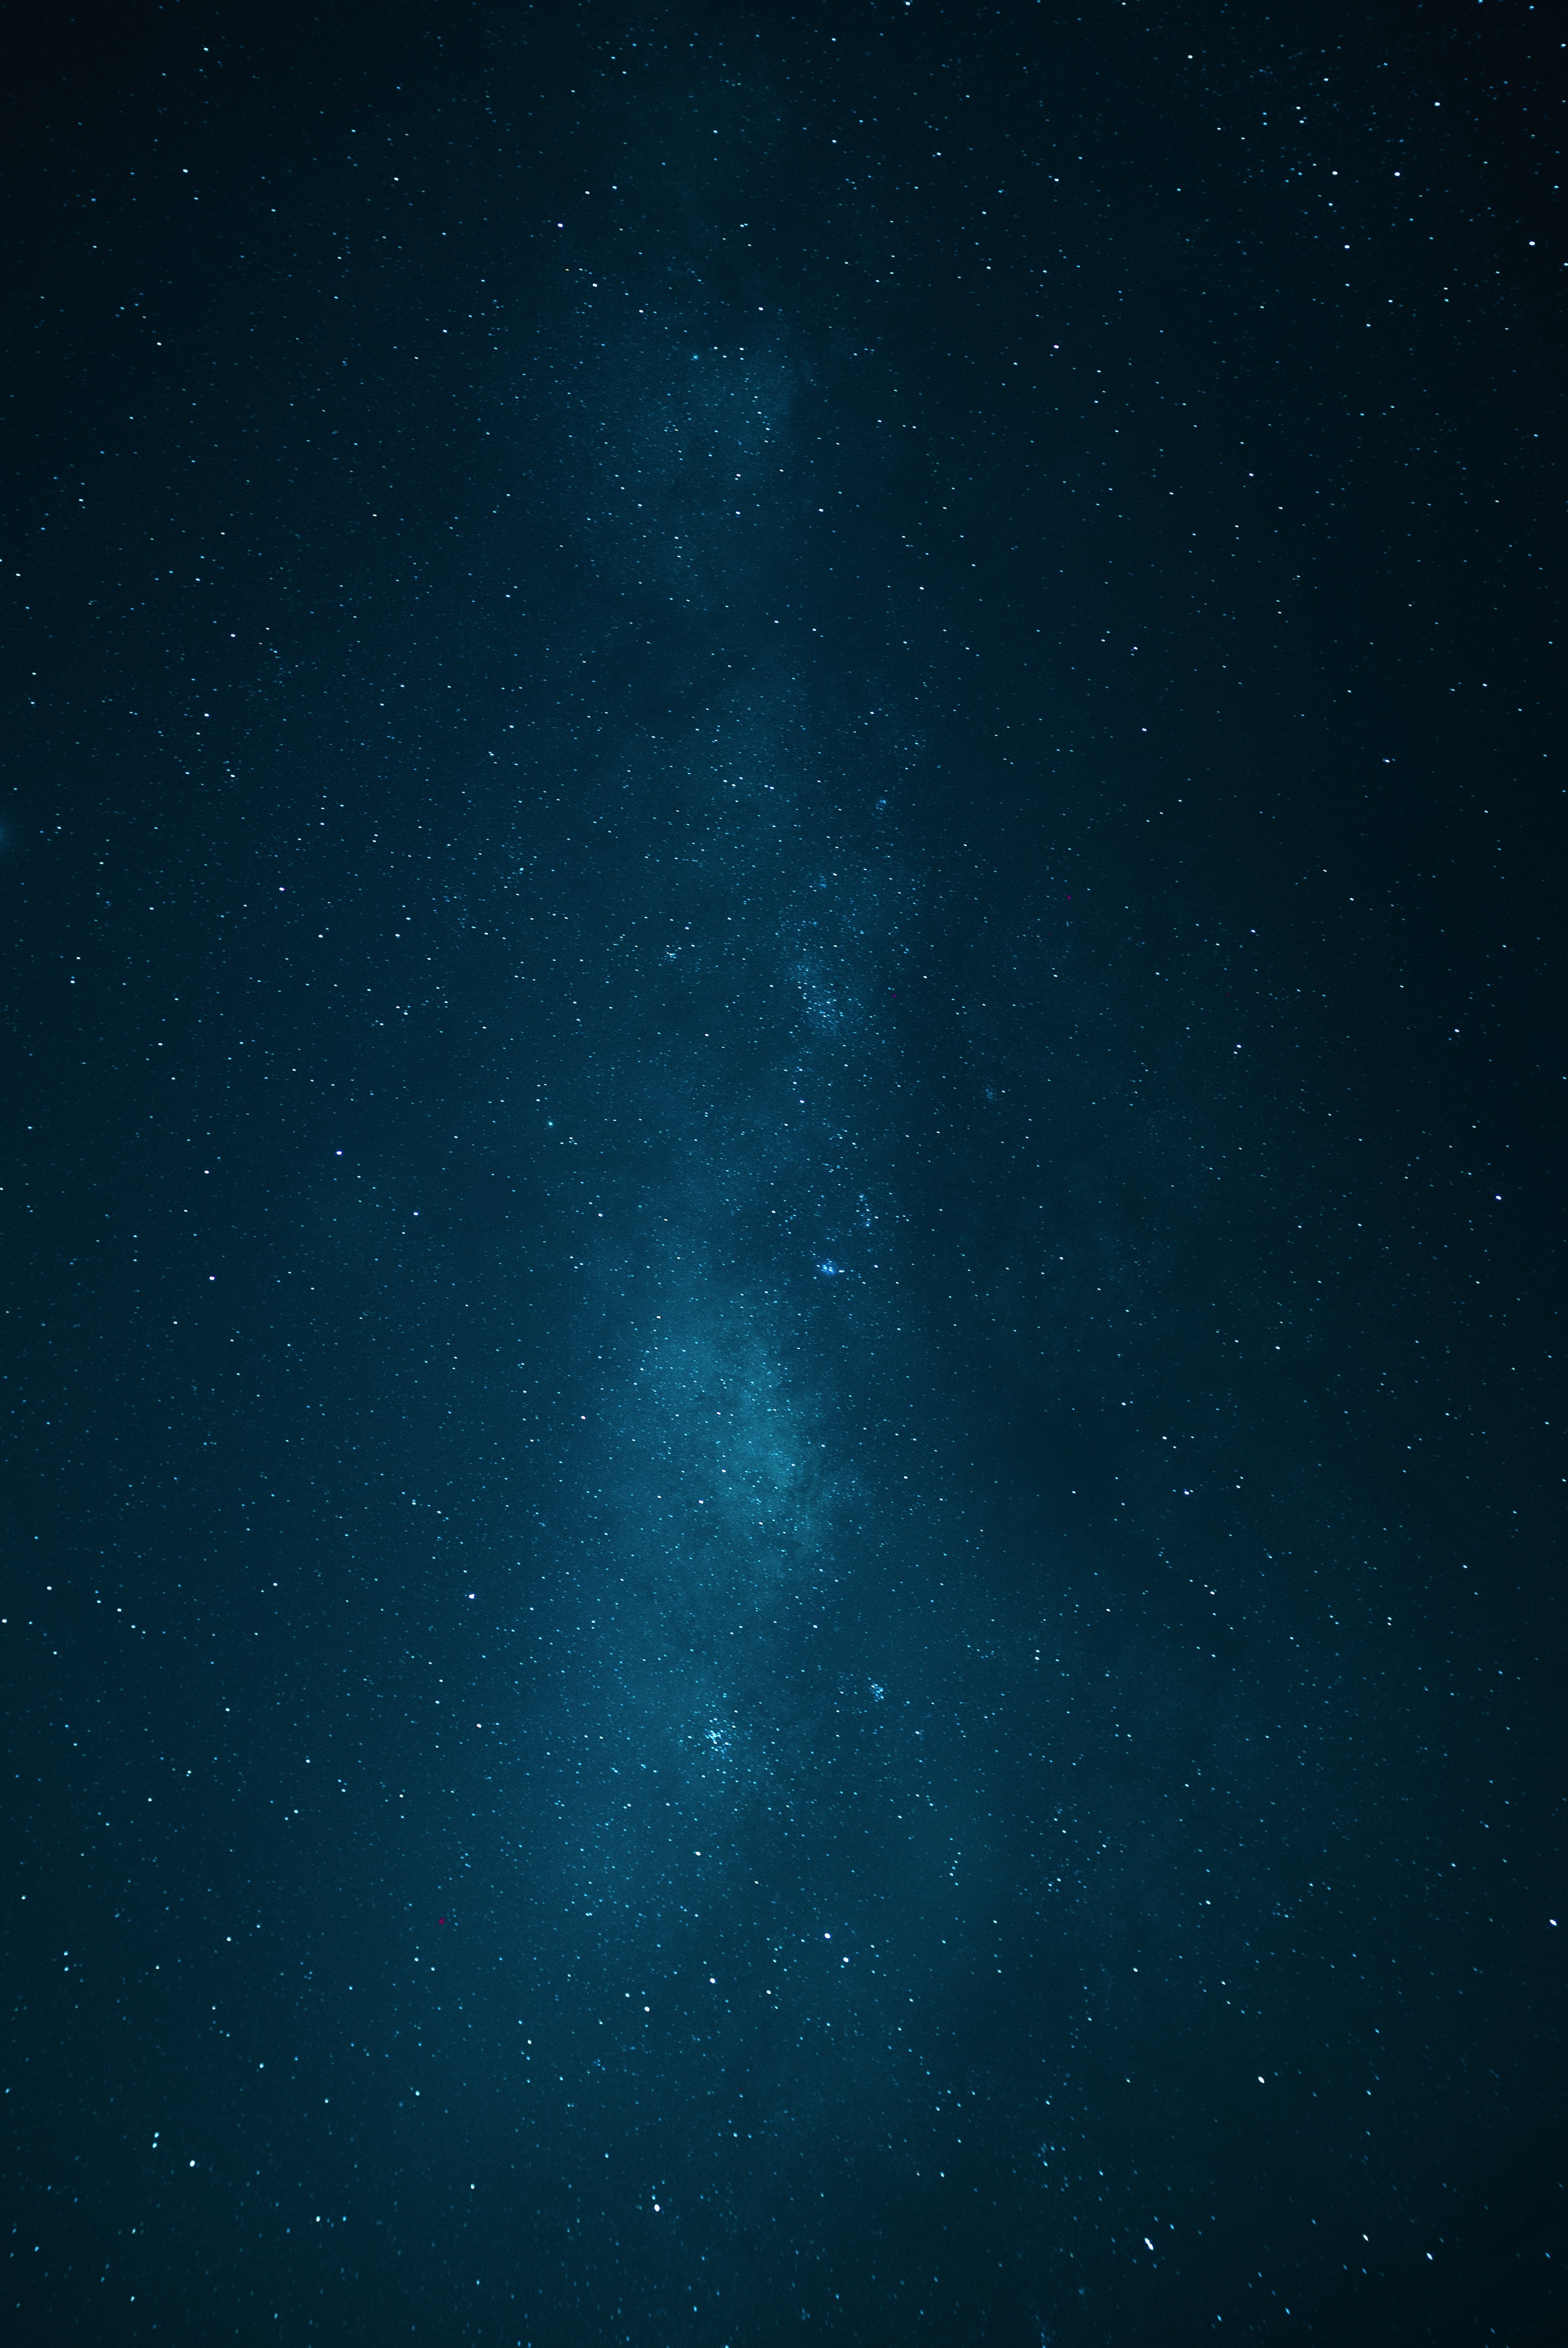

In [16]:
import base64
import plotly.express as px
fig = px.scatter(df_plot, x="aphelion", y="Y_axis", animation_group="object",
                 size = "area_mod",
                 animation_frame="minutes", hover_name="object", text = "text",
                 size_max = 30,
                 range_x=[df_plot['aphelion'].min() - df_plot['aphelion'].max()*0.06,
                          df_plot['aphelion'].max()*1.1],
                 range_y=[-0.2, 0.25],
                 color = 'object',
                 color_discrete_map=dict_colors,
                 labels={"aphelion": "Distance(km)"}
                )
#update text and marker lines
fig.update_traces(textposition='bottom center',
                  textfont_color='white',
                  marker=dict(opacity=1,
                              line=dict(width=0))
                 )
#insert wallpaper
image_filename = 'wallpaper.jpg'
plotly_logo = base64.b64encode(open(image_filename, 'rb').read())
fig.update_layout(xaxis=dict(showgrid=False, visible=True, zeroline=False),
                  yaxis=dict(showgrid=False, visible=False),
                  images= [dict(source='data:image/png;base64,{}'.format(plotly_logo.decode()),
                                xref="paper", yref="paper",
                                x=0, y=1,
                                sizex=1, sizey=1,
                                xanchor="left", yanchor="top",
                                sizing="stretch",
                                opacity = 0.99,
                                layer="below")],
                  legend_title = 'Object')
#play speed
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 20
fig.show()

Visualize the data.

In [17]:
list_obj = ['Sun', 'Neptune', 'FarFarOut']
list_dist = [0, 4537039826, 20958661727]
list_radius = [696340, 24622, 200]

df_obj = pd.DataFrame(zip(list_obj, list_dist, list_radius),
                     columns = ['object', 'aphelion', 'radius'])
df_obj

object     aphelion  radius
0        Sun            0  696340
1    Neptune   4537039826   24622
2  FarFarOut  20958661727     200

The sun to FarFarOut Create a DataFrame.

In [18]:
c = 299792458
c_kmh = (c/1000)*(60*60)       #light speed in km/h   >>   kilometer/hour

df_plot = get_plot(df_obj, c_kmh, 'aphelion', 'hours', 1.1)
df_plot.head()

object      aphelion    radius  hours  Y_axis          area          AU
0        Sun  0.000000e+00  696340.0      0     0.0  1.523325e+12    0.000000
1  FarFarOut  2.095866e+10     200.0      0     0.0  1.256637e+05  140.100000
2      Light  0.000000e+00   27084.2      0     0.1  2.304528e+09    0.000000
3    Neptune  4.537040e+09   24622.0      0     0.0  1.904568e+09   30.328238
4        Sun  0.000000e+00  696340.0      1     0.0  1.523325e+12    0.000000

Due to the distance between the Sun and FarFarOut being long, the speed of light will be used in kilometer per hour units to speed up the result.

In [19]:
sun_s_area = df_plot['area'].max()

Area_mod = [i if i >= sun_s_area*0.9 else i*100 for i in list(df_plot['area'])]
df_plot['area_mod'] = Area_mod
df_plot.sort_values(by=['object','hours'], inplace=True)

keep_text = []
for e,s,a,h in zip(df_plot.object, df_plot.aphelion, df_plot.AU, df_plot.hours):
    if e not in ['Sun', 'Light']:    #<br> for new line in HTML
        keep_text.append( '^<br>'+e+'<br>'+str(round(s/c_kmh,1))+' H'+'<br>'+str(round(a,1))+' AU')
    elif e == 'Light':
        keep_text.append(e+'<br>'+str(h)+' H')
    else:
        keep_text.append('')
        
df_plot['text'] = keep_text
df_plot.head()

object      aphelion  radius  hours  Y_axis           area     AU  \
1   FarFarOut  2.095866e+10   200.0      0     0.0  125663.706144  140.1   
6   FarFarOut  2.095866e+10   200.0      1     0.0  125663.706144  140.1   
11  FarFarOut  2.095866e+10   200.0      2     0.0  125663.706144  140.1   
15  FarFarOut  2.095866e+10   200.0      3     0.0  125663.706144  140.1   
18  FarFarOut  2.095866e+10   200.0      4     0.0  125663.706144  140.1   

        area_mod                                  text  
1   1.256637e+07  ^<br>FarFarOut<br>19.4 H<br>140.1 AU  
6   1.256637e+07  ^<br>FarFarOut<br>19.4 H<br>140.1 AU  
11  1.256637e+07  ^<br>FarFarOut<br>19.4 H<br>140.1 AU  
15  1.256637e+07  ^<br>FarFarOut<br>19.4 H<br>140.1 AU  
18  1.256637e+07  ^<br>FarFarOut<br>19.4 H<br>140.1 AU

Create a column to deal with the size and a text column for annotation. The time unit is in hours. FarFarOut is too small when they are plotted. We can use ^ (caret symbol) to point to its position.


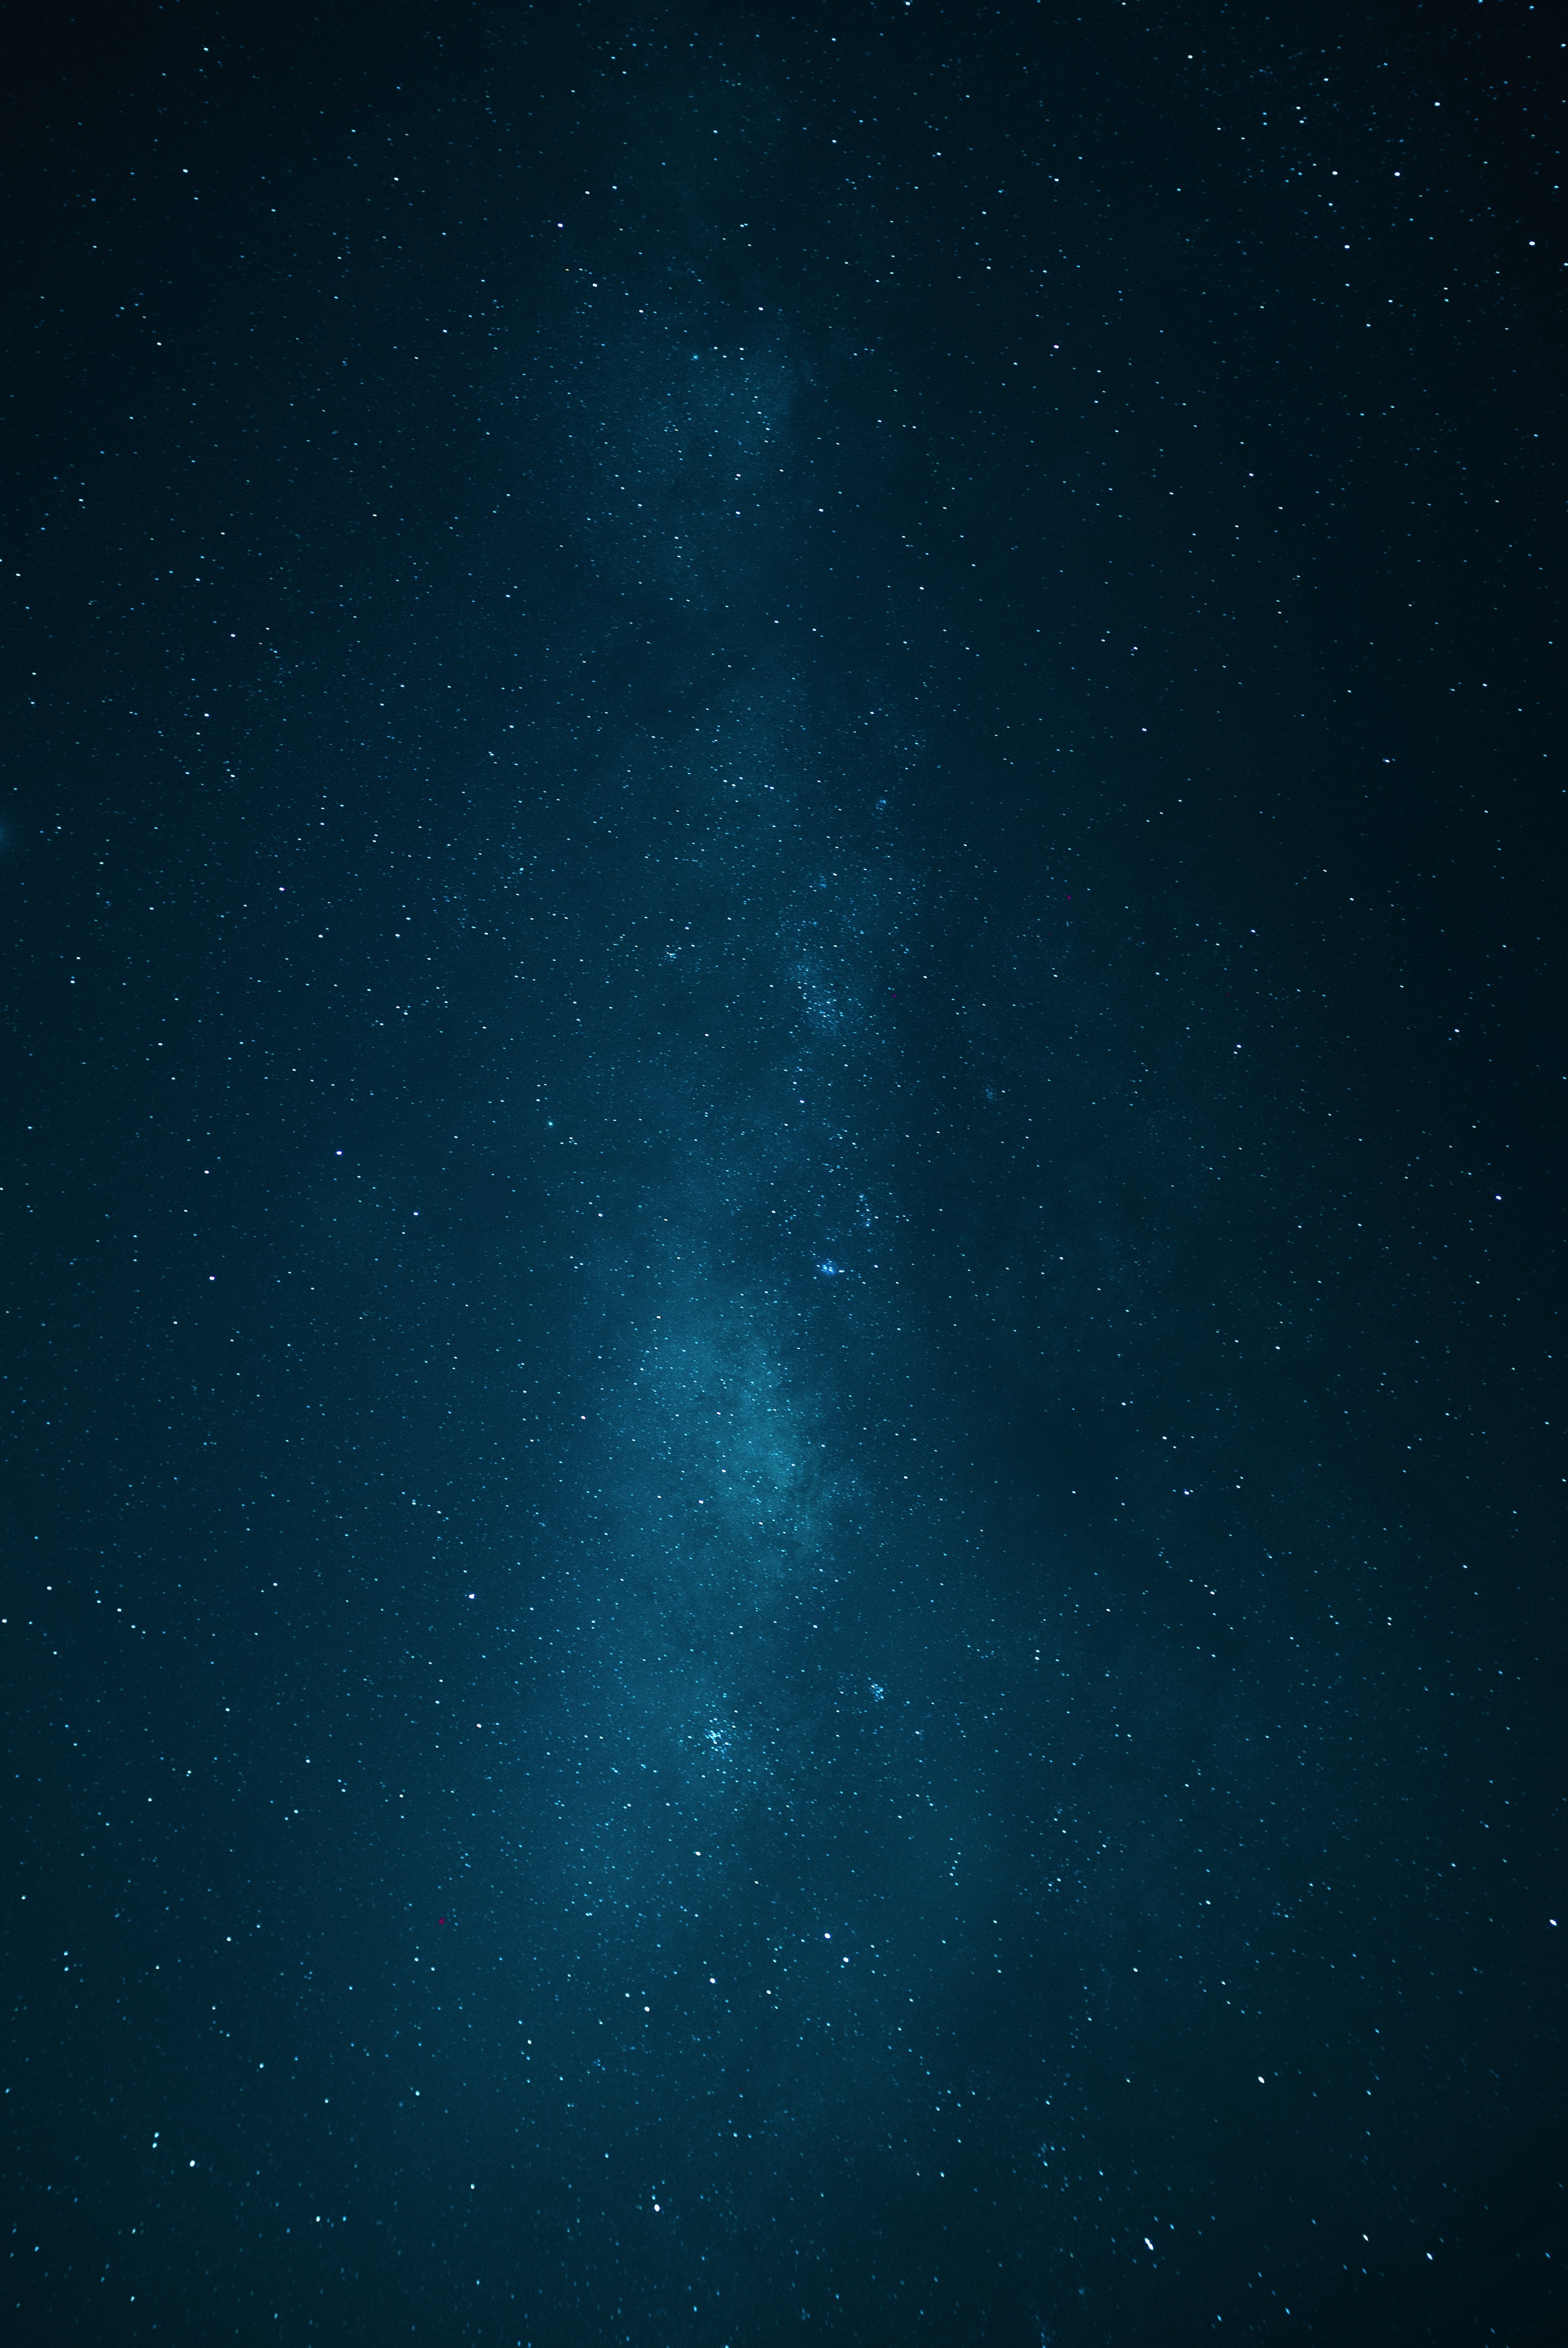

In [20]:
import base64
import plotly.express as px
fig = px.scatter(df_plot, x="aphelion", y="Y_axis", animation_group="object", size = "area_mod",
                 animation_frame="hours", hover_name="object", text = "text",
                 range_x=[df_plot['aphelion'].min() - df_plot['aphelion'].max()*0.06,
                          df_plot['aphelion'].max()*1.1],
                 range_y=[-0.2, 0.25],
                 color = 'object',
                 color_discrete_map=dict_colors,
                 labels={"aphelion": "Distance(km)"}
                )
#update text and marker lines
fig.update_traces(textposition='bottom center',
                  textfont_color='white',
                  marker=dict(opacity=1,
                              line=dict(width=0))
                 )
#insert wallpaper
image_filename = 'wallpaper.jpg'
plotly_logo = base64.b64encode(open(image_filename, 'rb').read())
fig.update_layout(xaxis=dict(showgrid=False, visible=True, zeroline=False),
                  yaxis=dict(showgrid=False, visible=False),
                  images= [dict(source='data:image/png;base64,{}'.format(plotly_logo.decode()),
                                xref="paper", yref="paper",
                                x=0, y=1,
                                sizex=1, sizey=1,
                                xanchor="left", yanchor="top",
                                sizing="stretch",
                                opacity = 0.99,
                                layer="below")],
                  legend_title = 'Object')
#play speed
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 200
fig.show()

Visualize the data.

In [21]:
list_planet = ['Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
list_moon = ['Moon', 'Deimos', 'Callisto', 'Iapetus', 'Oberon', 'Neso']
list_obj = list_planet + list_moon

list_dist = [0, 0, 0, 0, 0, 0,
             384399, 23463, 1882700, 3560820, 583520, 50045900]   #semi-major axis

list_radius = [6371, 3390, 69911, 58232, 25362, 24622,
               1737.4, 6.2, 2410.3, 734.3, 761.4, 30]             #mean radius

df_obj = pd.DataFrame(zip(list_obj, list_dist, list_radius),
                     columns = ['object', 'semimajor_axis', 'radius'])
df_obj

object  semimajor_axis   radius
0      Earth               0   6371.0
1       Mars               0   3390.0
2    Jupiter               0  69911.0
3     Saturn               0  58232.0
4     Uranus               0  25362.0
5    Neptune               0  24622.0
6       Moon          384399   1737.4
7     Deimos           23463      6.2
8   Callisto         1882700   2410.3
9    Iapetus         3560820    734.3
10    Oberon          583520    761.4
11      Neso        50045900     30.0

Each planet with its moon.The planets with the moons in the Solar System are Earth, Mars, Jupiter, Saturn, Uranus, and Neptune. Here I will plot some of their moons: Moon, Deimos, Callisto, Iapetus, Oberon, and Neso, respectively.

If you want to experiment with their other natural satellites, the code can be modified.

In [27]:
#create dict to assign Y-axis value
dict_moon = {'Light':3, 'Moon': 6, 'Deimos': 5, 'Callisto': 4, 'Iapetus': 2, 'Oberon': 1, 'Neso': 0}
dict_obj = {'Earth': 6, 'Mars': 5, 'Jupiter': 4, 'Saturn': 2, 'Uranus': 1, 'Neptune': 0}

dict_Y = {**dict_obj,**dict_moon}

Create a list of the planets and moons and a dictionary to assign Y-axis values.

In [23]:
c = 299792458
c_kms = c/1000       #light speed in km/s   >>   kilometer/second

df_plot = get_plot(df_obj, c_kms, 'semimajor_axis', 'seconds', 5)
df_plot

object  semimajor_axis    radius  seconds  Y_axis          area  \
0        Earth    0.000000e+00   6371.00        0     0.0  1.275161e+08   
1         Neso    5.004590e+07     30.00        0     0.0  2.827433e+03   
2       Oberon    5.835200e+05    761.40        0     0.0  1.821275e+06   
3      Iapetus    3.560820e+06    734.30        0     0.0  1.693936e+06   
4     Callisto    1.882700e+06   2410.30        0     0.0  1.825123e+07   
...        ...             ...       ...      ...     ...           ...   
2179  Callisto    1.882700e+06   2410.30      167     0.0  1.825123e+07   
2180   Iapetus    3.560820e+06    734.30      167     0.0  1.693936e+06   
2181    Oberon    5.835200e+05    761.40      167     0.0  1.821275e+06   
2182     Earth    0.000000e+00   6371.00      167     0.0  1.275161e+08   
2183     Light    5.006534e+07  14500.75      167     0.1  6.605882e+08   

            AU  
0     0.000000  
1     0.334536  
2     0.003901  
3     0.023803  
4     0.012585  
...        ...  
2179  0.012585  
2180  0.023803  
2181  0.003901  
2182  0.000000  
2183  0.334666  

[2184 rows x 7 columns]

Apply the function.

In [24]:
df_plot['Y_mod'] = [dict_Y[i] for i in df_plot.object]
df_plot['area'] = [i*10 for i in df_plot.area]

df_plot.sort_values(['object', 'seconds'],inplace=True)
df_plot.reset_index(drop=True, inplace=True)

keep_text = []
for e,s,a,t in zip(df_plot.object, df_plot.semimajor_axis, df_plot.AU, df_plot.seconds):
    if e in list_moon:    #<br> for new line in HTML
        keep_text.append(' < '+e+' '+str(round(s/c_kms,1))+'s'+' '+str(round(a,3))+' AU')
    elif e == 'Light':
        keep_text.append(' '+e+'<br>'+str(t)+' s')
    else: 
        keep_text.append('<br><br>'+e)
df_plot['text'] = keep_text

df_plot.iloc[801:806]

object  semimajor_axis   radius  seconds  Y_axis          area   AU  \
801  Jupiter             0.0  69911.0      129     0.0  1.535468e+11  0.0   
802  Jupiter             0.0  69911.0      130     0.0  1.535468e+11  0.0   
803  Jupiter             0.0  69911.0      131     0.0  1.535468e+11  0.0   
804  Jupiter             0.0  69911.0      132     0.0  1.535468e+11  0.0   
805  Jupiter             0.0  69911.0      133     0.0  1.535468e+11  0.0   

     Y_mod             text  
801      4  <br><br>Jupiter  
802      4  <br><br>Jupiter  
803      4  <br><br>Jupiter  
804      4  <br><br>Jupiter  
805      4  <br><br>Jupiter

Assign the Y-axis values to the objects with the dictionary. Create a column to deal with the size and a text column for annotation.




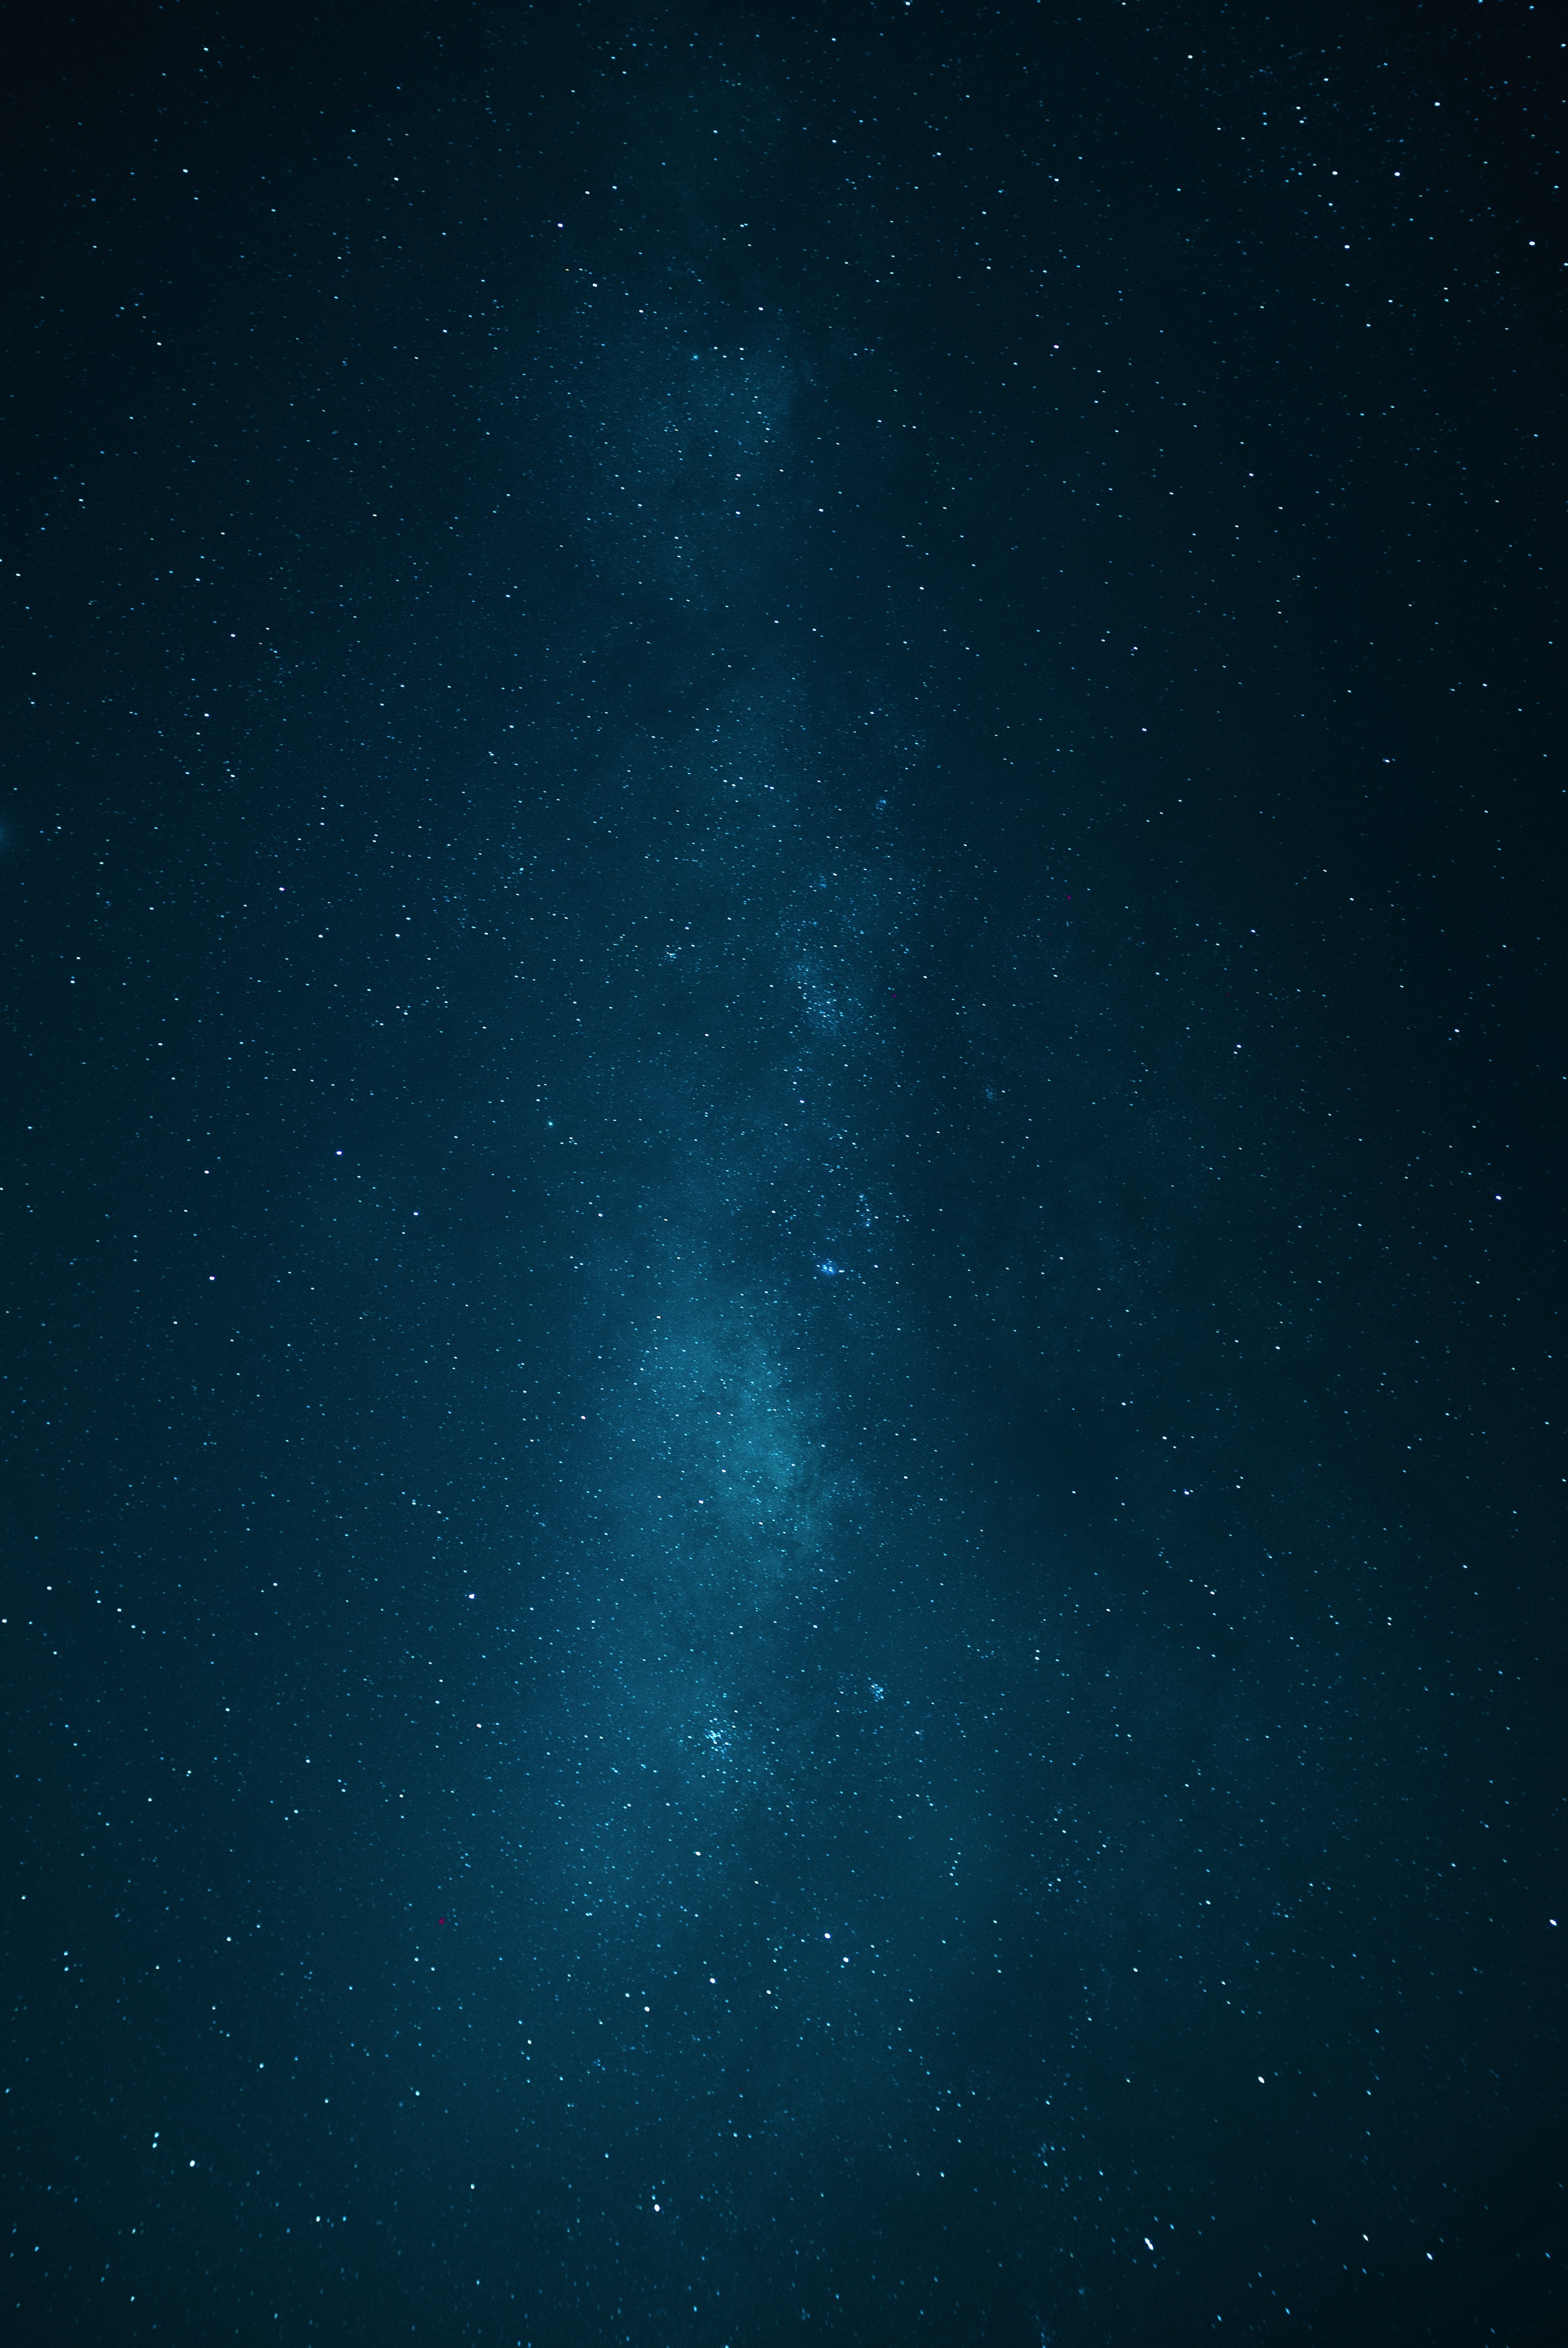

In [25]:
import base64
import plotly.express as px

fig = px.scatter(df_plot, x="semimajor_axis", y="Y_mod", animation_group="object", size = "area",
                 animation_frame="seconds", hover_name="object", text = "text",
                 range_x=[df_plot['semimajor_axis'].min() - df_plot['semimajor_axis'].max()*0.06,
                          df_plot['semimajor_axis'].max()*1.29],
                 range_y=[-1, 6.5],
                 size_max=30,
                 color = 'object',
                 color_discrete_map=dict_colors,
                 labels={"semimajor_axis": "Distance(km)"},
                 width=950, height=650,
                )
#update text and marker lines
fig.update_traces(textposition='middle right',
                  textfont_color='white',
                  marker=dict(opacity=1,
                              line=dict(width=0))
                 )
#insert wallpaper
image_filename = 'wallpaper.jpg'
plotly_logo = base64.b64encode(open(image_filename, 'rb').read())
fig.update_layout(xaxis=dict(showgrid=False, visible=True, zeroline=False),
                  yaxis=dict(showgrid=False, visible=False),
                  images= [dict(source='data:image/png;base64,{}'.format(plotly_logo.decode()),
                                xref="paper", yref="paper",
                                x=0, y=1,
                                sizex=1, sizey=1,
                                xanchor="left", yanchor="top",
                                sizing="stretch",
                                opacity = 0.99,
                                layer="below")],
                  legend_title = 'Object')
#play speed
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 25
fig.show()

Finally, visualize the data.